In [ ]:
import os
import sys
import time

import GCode
import GRBL
import matplotlib.pyplot as plt
import numpy as np
#import ushr.coord.homogeneous as h
import seaborn as sns

All units in mm. ```1``` = ```1 mm```.

In [2]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")
cnc.reset()
cnc.status


'<Idle|MPos:-245.900,-91.500,-1.000|Bf:15,127|FS:0,0|WCO:0.000,0.000,0.000>'

In [3]:
cnc.home()


19

In [4]:
def init():
    program = GCode.GCode()
    program.G0(F=500)
    program.G1(F=300)
    program.M3(S=1)
    program.G28()
    program.G21()  # Metric Units
    program.G90()  # Absolute positioning.
    program.G92(X=0, Y=0)
    program.M5()
    return program


In [5]:
cnc.run(init())


5.145123720169067

In [7]:
# Poplar 1x4". Cut
BlockHeight = 89.0  # mm
BlockLength = 2 * BlockHeight  # mm


In [8]:
x0 = 10
y0 = BlockHeight / 2


In [9]:
prog = GCode.GCode()
prog += init()
prog += GCode.Line(points=np.array([[x0, 0], [x0, BlockHeight]]), power=50)
prog += GCode.Line(points=np.array([[0, y0], [BlockLength, y0]]), power=50)


In [10]:
cycles = 2
total_distance = BlockLength - 10  # [mm]
wave_length = total_distance / cycles  # [mm]
amplitude = BlockHeight / 4
x = np.arange(0, total_distance, 1)
y = amplitude * np.sin(2 * np.pi * x / wave_length)


In [11]:
%matplotlib inlinesns.set()

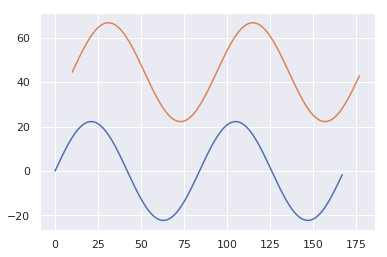

In [14]:
X = x + x0
Y = y + y0

fig, (ax1) = plt.subplots(1, 1)
ax1.grid(True)
ax1.plot(x, y, X, Y)


In [16]:
# Lasers Down
prog.M3(S=0)
prog.M5()
# Jog.
prog.G0(X=X[0], Y=Y[0])
# Lasers Up
prog.M3(S=255)
# Plot the Sine.
for x, y in zip(X, Y):
    prog.G1(X=x, Y=y)
# Lasers Down.
prog.M3(S=0)
prog.M5()
# Go home.
prog.G28()


In [18]:
cnc.run(prog)


149.3135986328125